In [2]:
# THIS CODE IS FROM MEDIUM BLOG
# SOURCE https://betterprogramming.pub/visualize-charts-using-groupby-and-aggregate-python-functions-56454820a25c

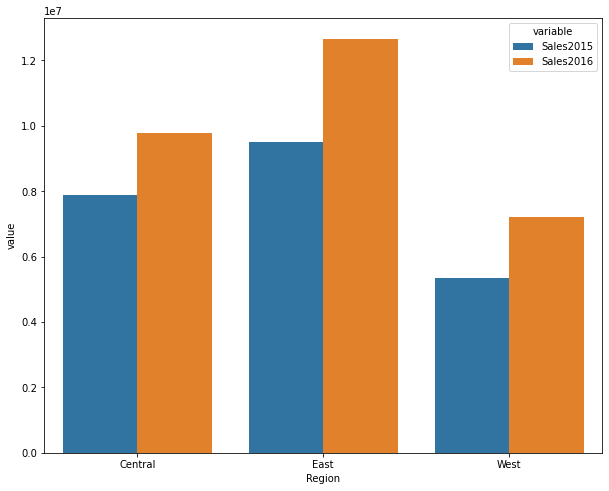

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import dataframe using pandas
sales = pd.read_csv("data/salesdata.csv")

# Groupping the data by "Region" and "Sales"
gb_sales = sales.groupby(by=["Region"]).aggregate({"Sales2015":"sum", "Sales2016":"sum"})
res = gb_sales.reset_index()
res_wide = res.melt(id_vars="Region")

# Setting figure size
plt.figure(figsize=(10,8))
# Creating barplot
sns.barplot(x="Region", y="value",data=res_wide, hue="variable")
# Show the plot
plt.show()

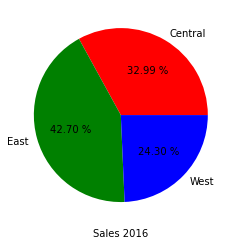

In [4]:
gb_sales2 = sales.groupby(by="Region")[["Sales2016"]].sum()
res_2 = gb_sales2.reset_index()

plt.pie(x="Sales2016",labels="Region", data=res_2, autopct="%.2f %%",colors=["r","g","b"])
plt.xlabel("Sales 2016")
# Show the plot
plt.show()

<Figure size 720x576 with 0 Axes>

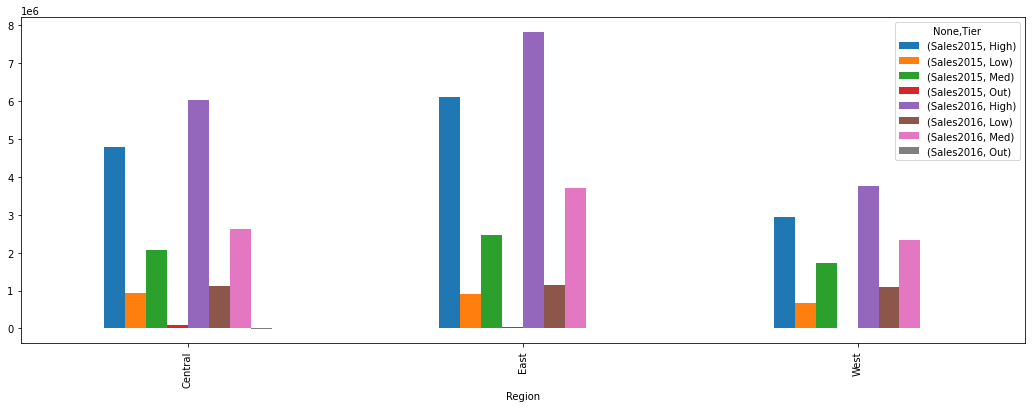

In [5]:
gb_sales3=sales.groupby(by=["Region", "Tier"]).aggregate({"Sales2015":"sum", "Sales2016":"sum"})
gb_res_3=gb_sales3.pivot_table(index="Region", columns="Tier", values=["Sales2015","Sales2016"])
plt.figure(figsize=(10,8))
gb_res_3.plot.bar(figsize=(18,6))
# Show the plot
plt.show()

<AxesSubplot:xlabel='Division'>

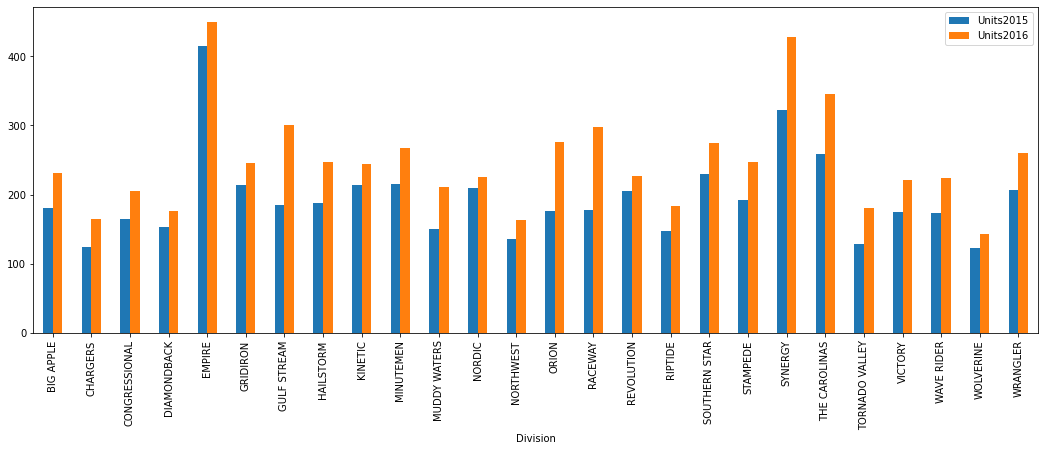

In [6]:
sales_tier_high=sales[sales.Tier=="High"]
gb_div=sales_tier_high.groupby(by="Division").aggregate({"Units2015":"sum", "Units2016":"sum"})
gb_div.plot.bar(figsize=(18,6))